# NIV Projekt

## Uvod

**Distributed denial-of-service (DDoS)** napad je zlonamerni poskus motenja običajnega prometa ciljnega strežnika, storitve ali omrežja tako, da njega ali njegovo okoliško infrastrukturo preplavi s prekomernim internetnim prometom. DDoS napadi so eden največjih groženj komunikacijskim omrežjem in aplikacijam skozi leta. Modeliranje DoS/DDoS napadov je potrebno za boljše razumevanje njihovega vedenja v procesu napada na sistem. Poglobljeno razumevanje DoS/DDoS napadov bo privedlo do razvoja učinkovitejših rešitev in protiukrepov. 

***
**Based on** DDoS Evaluation Dataset (CIC-DDoS2019) form Canadian Institute for Cybersecurity

**Author**: Ilija Tomic

***

# Obdelava podatkov

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
rowsNumber = 50000
df1 = pd.read_csv("../Dataset/03-11/LDAP.csv",nrows=rowsNumber,low_memory=False)
df1 = df1.sample(frac=0.5)
df2 = pd.read_csv("../Dataset/03-11/MSSQL.csv",nrows=rowsNumber,low_memory=False)
df2 = df2.sample(frac=0.4)
df3 = pd.read_csv("../Dataset/03-11/NetBIOS.csv",nrows=rowsNumber,low_memory=False)
df3 = df3.sample(frac=0.01)
df4 = pd.read_csv("../Dataset/03-11/Portmap.csv",nrows=rowsNumber,low_memory=False)
df4 = df4.sample(frac=0.5)
df5 = pd.read_csv("../Dataset/03-11/Syn.csv",nrows=rowsNumber,low_memory=False)
df5 = df5.sample(frac=0.45)
df6 = pd.read_csv("../Dataset/03-11/UDP.csv",nrows=rowsNumber,low_memory=False)
df6 = df6.sample(frac=0.3)
df7 = pd.read_csv("../Dataset/03-11/UDPLag.csv",nrows=rowsNumber,low_memory=False)
df7 = df7.sample(frac=0.3)

In [4]:
df=pd.concat([df1,df2,df3,df4,df5,df6,df7])
df = df.drop(df.columns[[0]], axis=1) 
data = df
data_ = df
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
30384,172.16.0.5-192.168.50.4-544-6644-17,172.16.0.5,544,192.168.50.4,6644,17,2018-11-03 10:09:04.362881,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
31790,172.16.0.5-192.168.50.4-729-17158-17,172.16.0.5,729,192.168.50.4,17158,17,2018-11-03 10:09:04.545837,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
30234,172.16.0.5-192.168.50.4-927-30865-17,172.16.0.5,927,192.168.50.4,30865,17,2018-11-03 10:09:04.344560,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
27296,172.16.0.5-192.168.50.4-1018-33387-17,172.16.0.5,1018,192.168.50.4,33387,17,2018-11-03 10:09:03.974517,48,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
4414,172.16.0.5-192.168.50.4-562-65331-17,172.16.0.5,562,192.168.50.4,65331,17,2018-11-03 10:09:01.130291,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS


In [5]:
df[' Label'].value_counts()

NetBIOS    25461
MSSQL      23146
Portmap    22659
Syn        22497
UDP        22271
LDAP        3938
BENIGN      3028
Name:  Label, dtype: int64

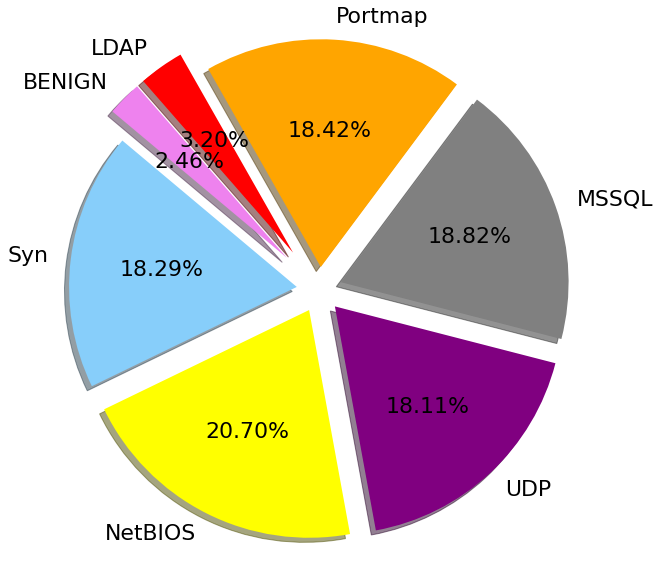

In [6]:
labels = 'Syn','NetBIOS','UDP','MSSQL','Portmap','LDAP','BENIGN' 
sizes =[len(data_[data_[' Label']=='Syn']), 
        len(data_[data_[' Label']=='NetBIOS']),
        len(data_[data_[' Label']=='UDP']),
        len(data_[data_[' Label']=='MSSQL']),
        len(data_[data_[' Label']=='Portmap']),
        len(data_[data_[' Label']=='LDAP']),
        len(data_[data_[' Label']=='BENIGN'])]
colors = ['lightskyblue', 'yellow', 'purple', 'grey', 'orange', 'red', 'violet']
explode = (0.1,0.1,0.1,0.1,0.1,0.2,0.2) # explode 1st slice

# Plot
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(10,10))

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

Text(0, 0.5, ' Flow Duration')

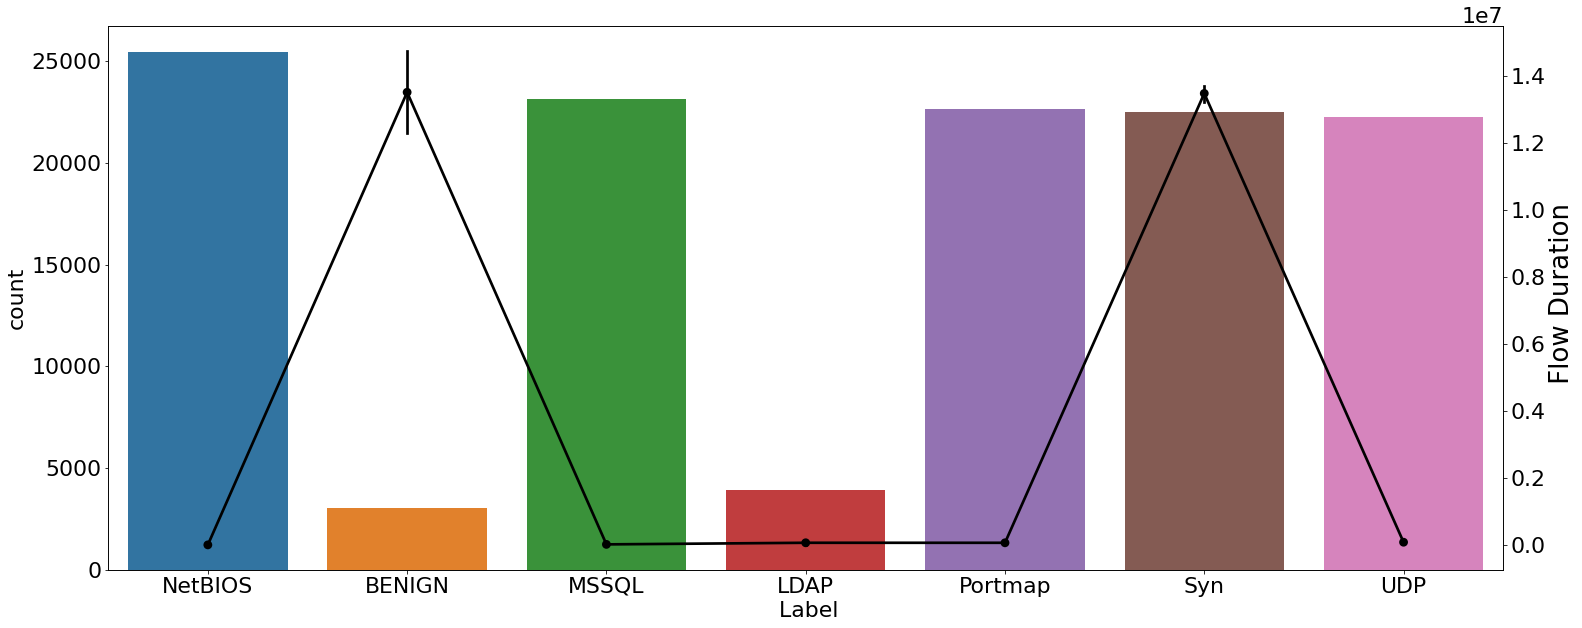

In [7]:
plt.figure(figsize=(25,10))
g1 = sns.countplot(x=' Label', data=data_)
gt = g1.twinx()
gt = sns.pointplot(y=' Flow Duration', x=' Label', data=data_, color='black', legend=True)
gt.set_ylabel(" Flow Duration", fontsize=26)

Text(0, 0.5, ' Total Fwd Packets')

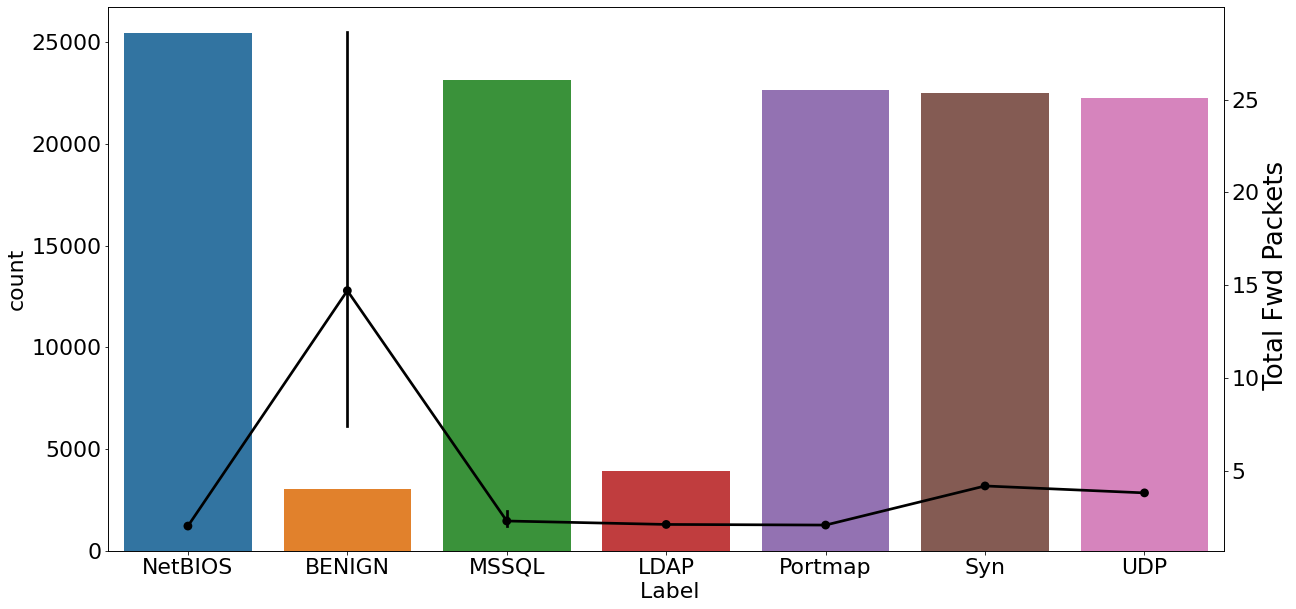

In [8]:
plt.figure(figsize=(20,10))
g1 = sns.countplot(x=' Label', data=data_)
gt = g1.twinx()
gt = sns.pointplot(y=' Total Fwd Packets', x=' Label', data=data_, color='black', legend=True)
gt.set_ylabel(" Total Fwd Packets", fontsize=26)

Text(0, 0.5, ' Total Backward Packets')

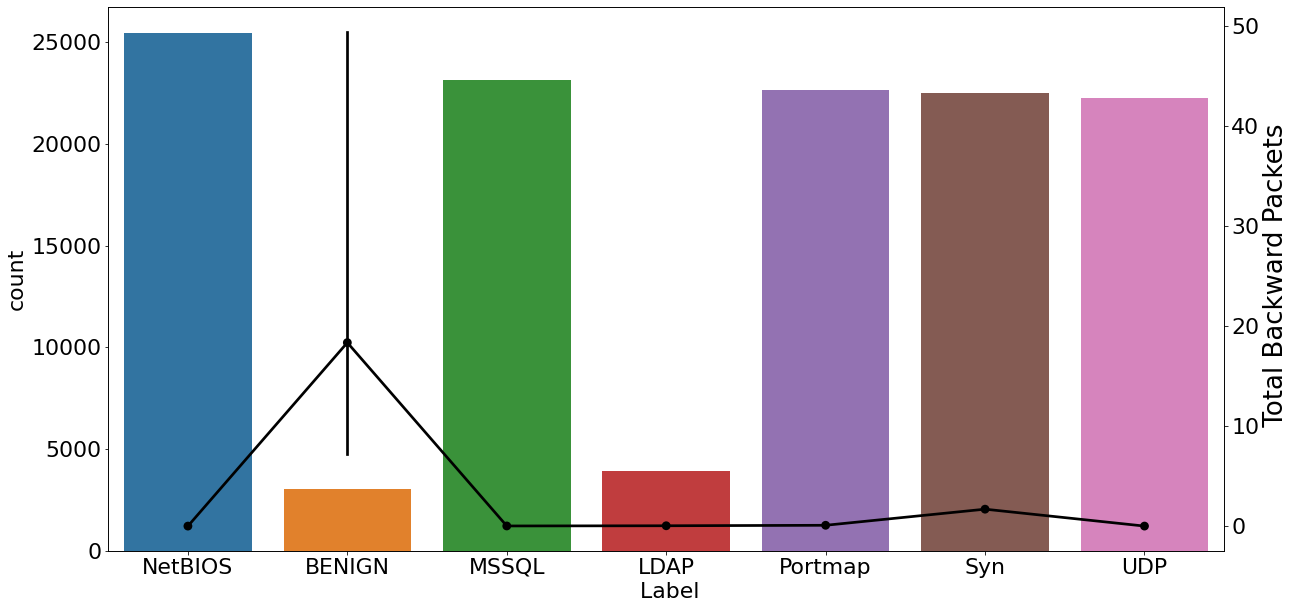

In [9]:
plt.figure(figsize=(20,10))
g1 = sns.countplot(x=' Label', data=data_)
gt = g1.twinx()
gt = sns.pointplot(y=' Total Backward Packets', x=' Label', data=data_, color='black', legend=True)
gt.set_ylabel(" Total Backward Packets", fontsize=26)

Text(0, 0.5, ' Bwd Packets/s')

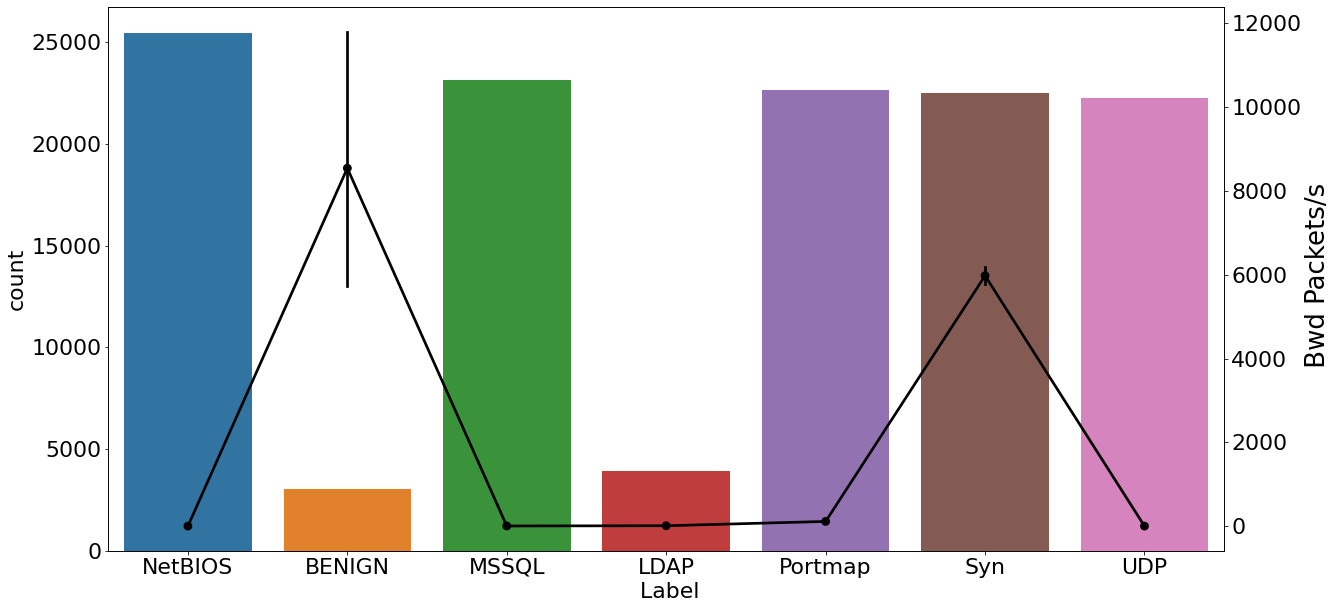

In [10]:
plt.figure(figsize=(20,10))
g1 = sns.countplot(x=' Label', data=data_)
gt = g1.twinx()
gt = sns.pointplot(y=' Bwd Packets/s', x=' Label', data=data_, color='black', legend=True)
gt.set_ylabel(" Bwd Packets/s", fontsize=26)

Text(0, 0.5, ' Average Packet Size')

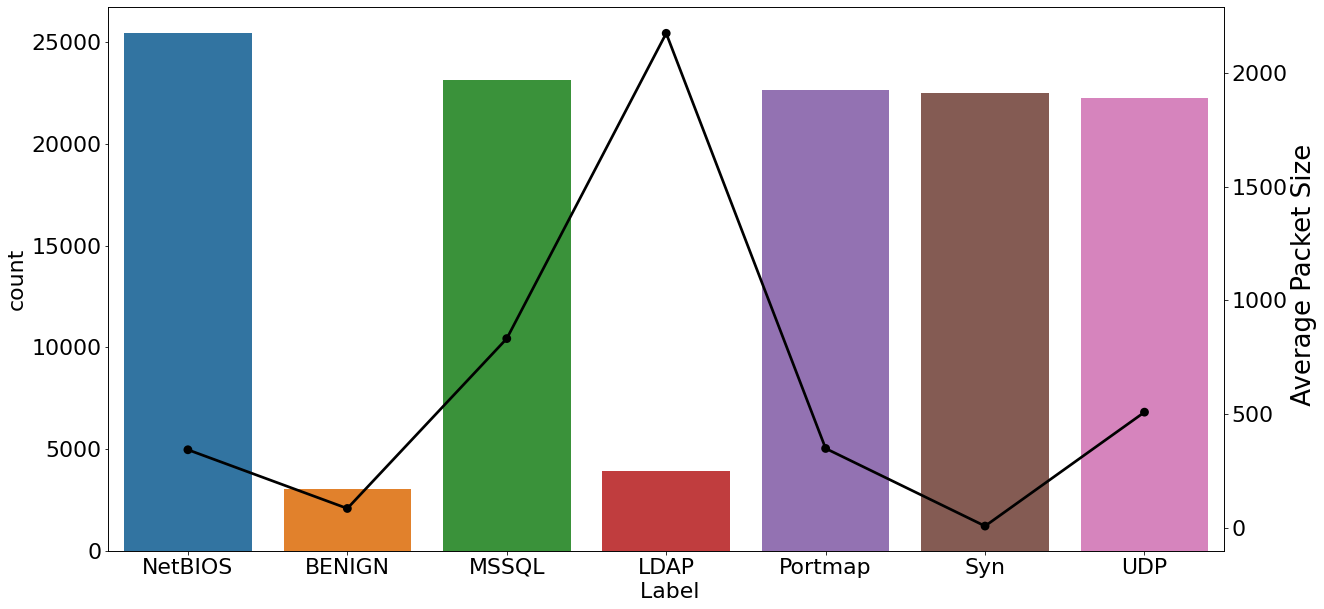

In [11]:
plt.figure(figsize=(20,10))
g1 = sns.countplot(x=' Label', data=data_)
gt = g1.twinx()
gt = sns.pointplot(y=' Average Packet Size', x=' Label', data=data_, color='black', legend=True)
gt.set_ylabel(" Average Packet Size", fontsize=26)

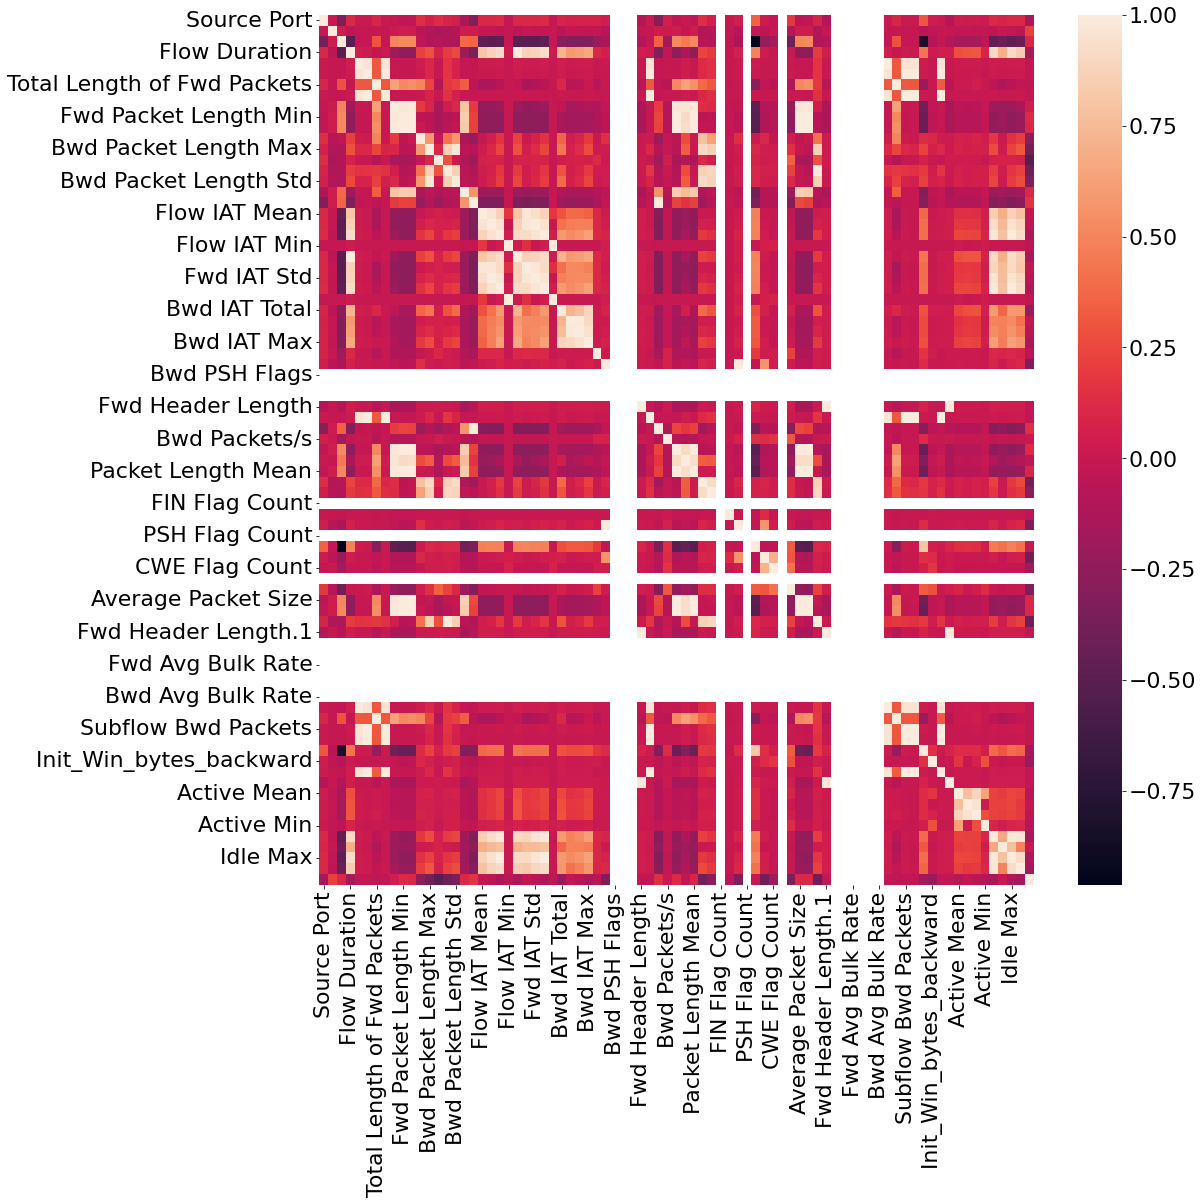

In [12]:
corr_matrx = data_.corr()
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(corr_matrx, annot=False, ax=ax, fmt='0.3f')
plt.show()